# Pre Lab 02 : Interpolation

As mentioned in the previous prelab, you are not expected to be as careful with the prelabs as with the labs.  The prelab notebook will not be held to the same level of completeness as we require for labs.  If you are stuck on or confused about things, you should put in effort to try to understand the important points, and then move on to other parts of the prelab.  If you cannot complete a portion of the prelab then you should say what you have done, what is confusing, *etc.*  In other words, give some indication of how far you got.  This can be done by describing in words what you are thinking.

## Objectives

In this prelab we will focus on
- Trigonometric functions and issues involved with them.  In particular units and difficulties in working with the inverse trigonometric functions.
- Using and understanding the behavior of splines as implemented in `scipy.interpolate`.

## Initialization

As always you should add initialization to the top of your notebook. Though not strictly necessary, even for the prelab it is best to get into the good habit of including all initialization and not *assuming* the environment is set up correctly.

In [43]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Trigonometric functions

As we saw in the previous lab, trigonometric functions in most math libraries accept arguments in radians.  Similarly, the inverse trigonometric functions return values in radians. 

To verify this is true in `numpy` calculate and print $\sin(\pi/2)$ and $\sin^{-1}(\sin(\pi/2))$. Compare the latter result to $\pi/2$.  Note that you can access the required trigonometric functions in `numpy` as `sin` and `arcsin`.

In [44]:
print("The sin of pi/2 is " +str( np.sin(np.pi/2)))
print("The arcsin of the sin of pi/2 is "+ str(np.arcsin(np.sin(np.pi/2))))
print("the decimal value of pi over 2 is " +str(np.pi/2))

The sin of pi/2 is 1.0
The arcsin of the sin of pi/2 is 1.5707963267948966
the decimal value of pi over 2 is 1.5707963267948966


We can do the same thing with other trigonometric functions.  Let us try the tangent function.  Calculate and print $\tan(5\pi/3)$, $\tan^{-1}(\tan(5\pi/3))$, and compare the result of the latter to $5\pi/3$.  Here you can use the `numpy` functions `tan` and `arctan`.

In [60]:
print("The tan of 5pi/3 is" , np.tan(5*np.pi/3))
print("The arctan of the tan of 5pi/3 is",(np.arctan(np.tan(5*np.pi/3))))
print("the decimal value of 5pi over 3 is",(5*np.pi/3))

The tan of 5pi/3 is -1.732050807568877
The arctan of the tan of 5pi/3 is -1.0471975511965976
the decimal value of 5pi over 3 is 5.235987755982989


You should notice that `arctan` **does not appear to work!**  To further explore this behavior, let us make a few plots.

The tangent function, like most functions in `numpy`, can accept arrays as an input. Define a range of $\theta$ values between $-\pi$ and $\pi$ in 500 evenly spaced points.  Use this array to plot the tangent function.

Text(0.5, 0, 'x')

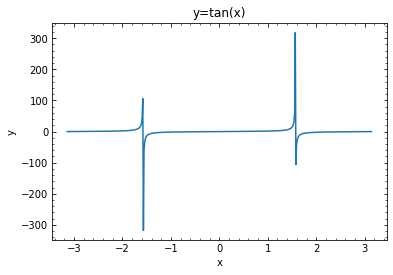

In [46]:
alist= np.linspace(-np.pi,np.pi,500)


fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(alist,np.tan(alist))

ax.set_title("y=tan(x)")
ax.set_ylabel("y")
ax.set_xlabel("x")

This plot does not look very good!  Not just that it is a "quick plot", but also the scaling of the $y$-axis makes this hard to read.

In contrast to other software you may have used to make plots, `matplotlib` will plot exactly what you tell it to.  Since the tangent function diverges in the plot range, it tries to show you all the values you asked for rather than trying to cleverly cut off the plot to show you what it thinks you wanted.  This is good and bad.  It is good that it shows you exactly what you asked for and does not hide anything, but bad because it produces a plot that can be harder to read.
  
Increasing the number of points plotted would not make things better, in fact, it would only make the plot look worse! (You should try this, change the plot to use 5000 values in the range instead of 500.)

Although it is good to know that the function we are plotting diverges at certain points, we typically want to see the shape of the curve where it does not diverge, not just see a flat line that looks like zero over most of the range.  To focus on the range of values of interest to us we can set the axis limits by hand.  Not surprisingly we can do this use the `xlim` and `ylim` functions from `pyplot`.  (If we are doing this using axis objects recall that we need to prepend these with `set_`, so we would use `ax.set_ylim` for the limits on the $y$-axis.) Recreate your previous plot showing $y$ from $-7$ to $7$, and $x$ from $-\pi$ to $\pi$.

(-3.141592653589793, 3.141592653589793)

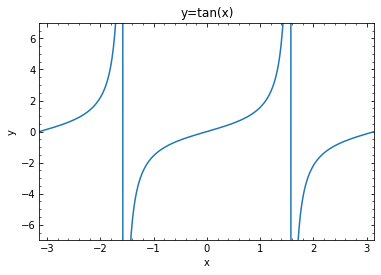

In [47]:



fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(alist,np.tan(alist))

ax.set_title("y=tan(x)")
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_ylim(-7,7)
ax.set_xlim(-np.pi,np.pi)

Next, we look at how the inverse tangent behaves by again making a plot.  Using the same $\theta$ values as above, plot $\tan^{-1}(\tan \theta)$.  We would expect this to just be a plot of $\theta$ vs $\theta$, in otherwords, just a diagonal line.

(-3.141592653589793, 3.141592653589793)

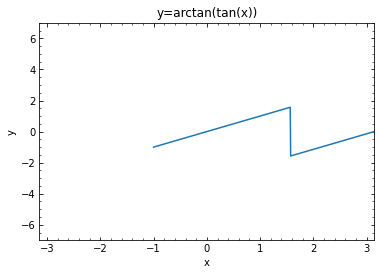

In [48]:
alist= np.linspace(-1**np.pi,np.pi,500)


fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(alist,np.arctan(np.tan(alist)))

ax.set_title("y=arctan(tan(x))")
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_ylim(-7,7)
ax.set_xlim(-np.pi,np.pi)

Unfortunately, it isn't!  Instead it should look more like a sawtooth.  What is going on here?

Recall from your high school trigonometry that the value of the arctangent depends on the  quadrant in which you are performing the calculation.  This information is not available to `arctan`.  To see this, for a point a distance $r$ from the origin and an angle $\theta$ from the $x$-axis
$$\tan(\theta) = \frac{y}{x} = \frac{r\sin\theta}{r\cos\theta} = \frac{\sin\theta}{\cos\theta} .$$

Further recall that the signs of the $x$ and $y$ coordinates of our point determine the quadrant in which it is placed.  These signs get "lost" when we take the ratio.  To keep this information all math libraries (should, or must) define a new arctangent function that takes two arguments instead of one.  In `numpy` this function is called `arctan2(y,x)`.  Notice the order of the arguments, here `y` represents the numerator and `x` the denominator in the definition of the tangent given above. [Another common name is `atan2`.  *Almost all* libraries I have seen use the same order of the arguments as `numpy`, but sadly not all.  I have encountered cases where they are switched.  You should always check your documentation before blindly using a function.  You have been warned!]

Coming back to our example we can choose $y=\sin\theta$ and $x=\cos\theta$ to specify the quandrant for the test problem we have been working on.  Below, make a plot of $\tan^{-1}(\tan \theta)$ now using `arctan2`.

(-3.141592653589793, 3.141592653589793)

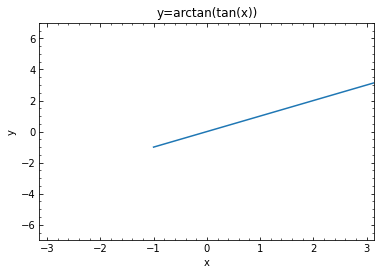

In [49]:
alist= np.linspace(-1**np.pi,np.pi,500)


fig= plt.figure()
ax = fig.add_subplot(111)
ax.plot(alist,np.arctan2(np.sin(alist),np.cos(alist)))

ax.set_title("y=arctan(tan(x))")
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_ylim(-7,7)
ax.set_xlim(-np.pi,np.pi)

This should correctly look like a "boring" diagonal line.  If you experiment with the $\theta$ values used, you will also note that it returns angles in the range $[-\pi,\pi)$ rather than $[0,2\pi)$.

## Accessing Data

When solving actual problems with actual data we need to get the data into a format `numpy` can use.  One way to do this is to read in the data from an existing file.  A simple method for doing this is through the `loadtxt` function.  Here we will just use it to read in a simple data table, in the future we will explore some of its other features.  Since we have the full power of Python behind us there are many ways we can access the file containing our data table.

For Homework 2 you will need to use some data located in a table accessible from the [GitHub Repository](https://github.com/cwru-phys-250/p250-spring-2022) at https://raw.githubusercontent.com/cwru-phys-250/p250-spring-2022/master/data/hw2.dat.  (Notice that we need to access the raw file.) We can actually read this table directly from the web without needing to download the file!  The following code does that for us.  In this case it will store the data in two arrays, the observation time in the array called `time` (given in days) and the satellite position in the array called `position` (given in arcseconds).

Below is some boiler plate code we can use for reading a data file.  This is the "pythonic" way to read a file.  We will say more about this in the future, for now just use this code.

Note: You should look at the homework if you have not already.  We will work a little with the data here as preparation for solving the problem given in the homework.

In [50]:
import urllib.request
url = 'https://raw.githubusercontent.com/cwru-phys-250/p250-spring-2022/master/data/hw2.dat'
with urllib.request.urlopen(url) as fp:
    (time, position) = np.loadtxt(fp, unpack=True)

print ("Values stored in the `time` array:\n\t", time)
print ("Values stored in the `position` array:\n\t", position)

Values stored in the `time` array:
	 [1. 2. 3. 4. 7. 8. 9.]
Values stored in the `position` array:
	 [-3.4083885 -5.6100975 -5.8256509 -3.9787359  5.3127362  5.9562532
  4.4910645]


To become familiar with new data we should first make a plot of it.  Here we would like to plot the position versus time as points, instead of as a line.  This can be done using `plot` (you should look up how to do this and be familiar with it), however a shorthand way to do it is to instead use `scatter`.  (You are looking up the documentation of `scatter` now, right?) 
Create such a plot below.  Note: `plot` and `scatter` do **not** do exactly the same thing.  `matplotlib` does its best to show you what you asked for, but not always what you want.  It is interesting to compare the choices it makes and the adjustments needed for the plot to be easy to read.  In particular when using `plot` you will probably want to adjust the limits on the axes to see all the points clearly.  The same is not true for `scatter`.

Text(0.5, 0, 'Position')

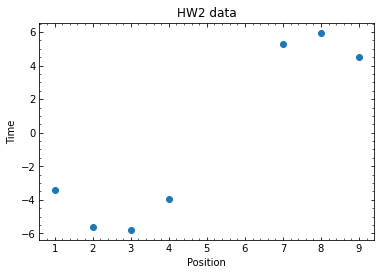

In [51]:


fig= plt.figure()
ax = fig.add_subplot(111)
ax.scatter(time,position)

ax.set_title("HW2 data")
ax.set_ylabel("Time")
ax.set_xlabel("Position")


The goal now is to create a function which interpolates between the data points.  To do this, we will use functions from the `scipy.interpolate` subpackage.  We can import this, giving it a shorthand name `interp`, and look at the docs for a list of available functions as was done in the example notebook this week.

## Using Splines

Import `scipy.interpolate`.  It is best to do this in the initialization at the top of the notebook.  The main function we will study here is `InterpolatedUnivariateSpline`.  You should review its documentation and the example notebook from this week.  The interface it provides is not the easiest to understand so we will explore it in more detail.

Note: In the documentation of some functions you may see the first argument to the function is called `self`.  In general, you can ignore it; it is **not** an argument you should attempt to pass.  The arguments you provide will begin after it.  The `self` argument is a result of how objects are implemented in Python.  It becomes important if you wish to create your own classes; something we will unfortunately not do this semester.

In [52]:
?interp.InterpolatedUnivariateSpline

Keeping this in mind, we can create a spline from the data we read in above:

In [53]:
posInterpolation = interp.InterpolatedUnivariateSpline(time, position)
posInterpolation

Notice that an object is returned.  We should look up documentation for this object and use `Tab` completion to see the functions contained in this object. (Do this now!)

When reading the documention for the object stored in `posInterpolation` make sure you scroll all the way to the bottom where some important information is contained.  From there we see that `posInterpolation` can be called as a function.  When done so it returns the interpolated values for all the input values.  Further, we can easily access derivatives of the spline as we will see.

Interpolation produces a curve that is exact at the data points used to construct the spline.  We can verify this by evaluating the spline at one of the times from our data and comparing it to the given position.  Here we will use the third time in our data.  Note that arrays in `numpy` are indexed starting from zero so the third element has index 2.

In [54]:
# These two better be the same!
print(posInterpolation(time[2]), position[2])

-5.825650900000001 -5.8256509


### Derivatives and Integrals

A spline is a piecewise polynomial interpolation.  Since it is easy to take derivatives and integrals of polynomials it is also easy to do the same for a spline.  When you look at the list of functions available in our spline, `posInterpolation`, you will see a confusing list available.  There is both `derivative` and `derivatives` along with `integral` and `antiderivative`.  Looking at the documentation for each function we understand why they exist.  One function evaluates all the derivatives for a fixed point (`derivatives`) and the other constructs a new spline that is the derivative of the original one (`derivative`).  The same is true for the two integral related functions.

For derivatives there is an even easier way to calculate them.  When we evaluate the spline as we did in the test above there is an optional argument we can include which calculates the derivative.  The basic form is
> `posInterpolation(x, nu=0)`

where `nu` is the order of the derivative.  The default `nu=0` means to evaluate the function (no derivatives), `nu=1` is the first derivative, *etc*. 

To explore this more let us calculate the derivative at the time 2.2.  First use `derivatives` for this.  It will produce an array of all the derivatives of the spline at this time.

In [55]:
posInterpolation.derivatives(2.2)

array([-5.82001912, -0.84769315,  2.03564615,  0.24745275])

You will find there are only a few values, but, this is suppose to be **all** the derivatives.  Explain why there are only a few, in fact, explain why there are exactly the number you find.  (Hint: What is the order of the piecewise polynomial used in the spline we created?)

After the 4 derivative, taking a derivative will just return 0 since it is a 4th degree polynomial.

Now use the `nu` argument as discussed above to calculate the derivatives and compare them to the values from the list you just found. (You only need to show one example, but should verify they all work, it is also interesting to see what happens when you use a large value for `nu`.)

In [56]:
posInterpolation(2.2,nu=3)## values are same for nu 0,1,2,3 but throws an error for anything greater

array(0.24745275)

An advantage of using the `nu` argument is that we can calculate the derivative at a given order for an array of values.  Let us put all these ideas together by producing a plot.  Do this by creating a finely spaces array of time values from 0 to 12.  Include lines for the spline and its first derivative on this plot.  Also include the original data as points in the plot.

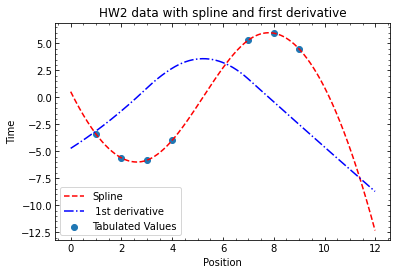

In [57]:
alist=np.arange(0,12,0.01)
fig= plt.figure()
ax = fig.add_subplot(111)
ax.scatter(time,position, label='Tabulated Values')
ax.plot(alist,posInterpolation(alist),'r--' ,label='Spline')
ax.plot(alist,posInterpolation(alist,nu=1),'b-.',  label=' 1st derivative')

ax.set_title("HW2 data with spline and first derivative")
ax.set_ylabel("Time")
ax.set_xlabel("Position")
plt.legend()

## Turning in the PreLab

All prelabs will be handled as was done for PreLab01.  See that file for details.  It will be assumed from now on that you have read and understood the procedure and what it means when you submit a prelab.